In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('C:\\Users\\91988\\OneDrive\\Desktop\\Case+Study+Notebook\\Case Study Notebook\\googleplaystore_v2.csv')
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
data.Rating.isnull().sum()

1474

missing values in rating
 - Drop those missing values

In [6]:
data1 = data[~data['Rating'].isnull()]

In [7]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [8]:
data1['Android Ver'].isnull().sum()

3

In [9]:
data1[data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
data1.loc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                         21516.529524
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [11]:
data1[(data1['Android Ver'].isnull() & (data1['Category'] == '1.9'))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
data1 = data1[~(data1['Android Ver'].isnull() & (data1['Category'] == '1.9'))]

In [13]:
data1[data1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [14]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [15]:
data1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [16]:
data1['Android Ver'].mode()[0]

'4.1 and up'

In [17]:
data1['Android Ver'] = data1['Android Ver'].fillna(data1['Android Ver'].mode()[0])

In [18]:
data1['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [19]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [20]:
data1[data1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [21]:
data1['Current Ver'].value_counts()

Varies with device     1415
1.0                     458
1.1                     195
1.2                     126
1.3                     120
                       ... 
2.59.8                    1
4.4.0.4                   1
V1.0.9                    1
3.34.0+1702241319.a       1
2.26.5.0                  1
Name: Current Ver, Length: 2638, dtype: int64

In [22]:
data1['Current Ver'].mode()[0]

'Varies with device'

In [23]:
data1['Current Ver'] = data1['Current Ver'].fillna(data1['Current Ver'].mode()[0])

In [24]:
data1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


price column
 -Handeld the price column

In [27]:
data1.Price.value_counts()

0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$1.59        1
$3.02        1
$4.60        1
$19.40       1
$2.95        1
Name: Price, Length: 73, dtype: int64

In [28]:
data1.Price = data1.Price.apply(lambda x: 0 if x=='0' else float(x[1:]))

In [29]:
data1.Price.dtypes

dtype('float64')

In [30]:
data1.Price.value_counts()

0.00     8719
2.99      114
0.99      107
4.99       70
1.99       59
         ... 
1.61        1
4.60        1
2.90        1
39.99       1
14.00       1
Name: Price, Length: 73, dtype: int64

handle the reviews column

In [31]:
data1.Reviews.value_counts()

2          83
3          78
5          74
4          74
1          67
           ..
497         1
38297       1
20535       1
12257       1
1520959     1
Name: Reviews, Length: 5992, dtype: int64

In [32]:
data1.Reviews = data1.Reviews.astype("int64")

In [33]:
data1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

##clean and handled the install columns

In [34]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [35]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## change the type of install

In [36]:
data1.Installs.isnull().sum()

0

In [37]:
data1.Installs.value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [38]:
def convert_Installs_cell(cell):
    if ',' in cell:
        return cell.replace(',','')
    else:
        return cell

In [39]:
data1['Installs'] = data1.Installs.apply(convert_Installs_cell)

In [40]:
data1.Installs.value_counts() 

1000000+       1577
10000000+      1252
100000+        1150
10000+         1010
5000000+        752
1000+           713
500000+         538
50000+          467
5000+           432
100000000+      409
100+            309
50000000+       289
500+            201
500000000+       72
10+              69
1000000000+      58
50+              56
5+                9
1+                3
Name: Installs, dtype: int64

In [41]:
data1['Installs'] = data1.Installs.apply(lambda x: x[:-1])

In [42]:
data1.Installs.value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [43]:
data1['Installs'] = data1.Installs.astype('int64')

In [44]:
data1.Installs.value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [45]:
data1.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [46]:
data1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

## Sanity Checks
awg rating between 1-5

In [47]:
data1.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Reviews Should be <= Install

In [48]:
data1[(data1.Reviews > data1.Installs)].shape

(7, 13)

In [49]:
data1[(data1.Reviews > data1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [50]:
data1 = data1[~(data1.Reviews > data1.Installs)]

## for free app price should not be greater than zero

In [51]:
data1[(data1.Type== 'Free') & (data1.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## identifiying and handling the outliers and extream liers values

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

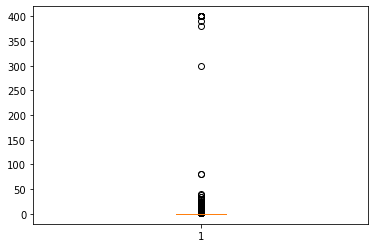

In [53]:
plt.boxplot(data1.Price)
plt.show

In [54]:
data1[data1.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [55]:
data1 = data1[data1.Price<200]

In [56]:
data1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<AxesSubplot:>

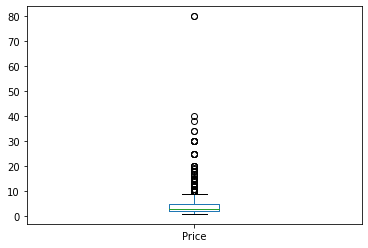

In [57]:
data1[data1.Price>0].Price.plot.box()

In [58]:
data1 = data1[data1.Price <= 30]

In [59]:
data1.shape

(9338, 13)

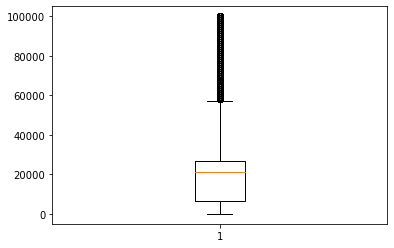

In [60]:
plt.boxplot(data1.Size)
plt.show()

## data analysis for bussiness question

In [61]:
import warnings
warnings.filterwarnings("ignore")

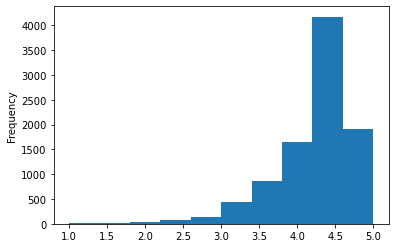

In [62]:
data1.Rating.plot.hist()
plt.show()

## Using Seaborn 

In [63]:
import seaborn as sns

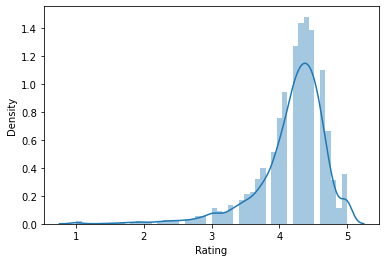

In [64]:
sns.distplot(data1.Rating)
plt.show()

<AxesSubplot:xlabel='Rating'>

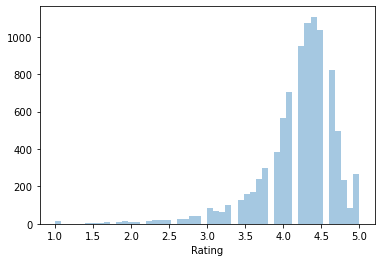

In [65]:
sns.distplot(data1.Rating, kde=False)

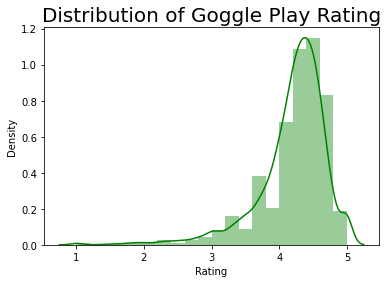

In [66]:
sns.distplot(data1.Rating, bins=20, color='g')
plt.title("Distribution of Goggle Play Rating", fontsize=20)
plt.show()

## using different style

In [67]:
?sns.set_style

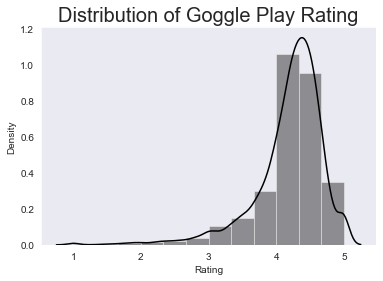

In [68]:
sns.set_style("dark")
sns.distplot(data1.Rating, bins= 12, color= "black")
plt.title("Distribution of Goggle Play Rating", fontsize=20)
plt.show()

## matplotlib themes/styles

In [69]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [70]:
plt.style.use('ggplot')

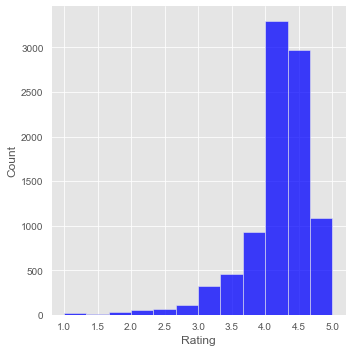

In [71]:
sns.displot(data1.Rating, bins= 12, color="blue")
plt.show()

In [72]:
plt.style.use('classic')

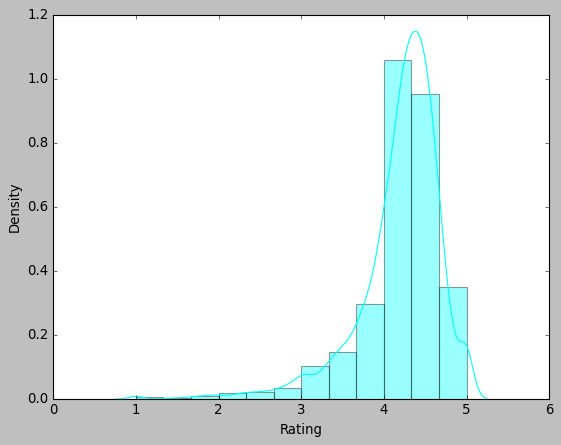

In [73]:
sns.distplot(data1.Rating, bins= 12, color= "cyan")
plt.show()

In [74]:
plt.style.use("seaborn-whitegrid")

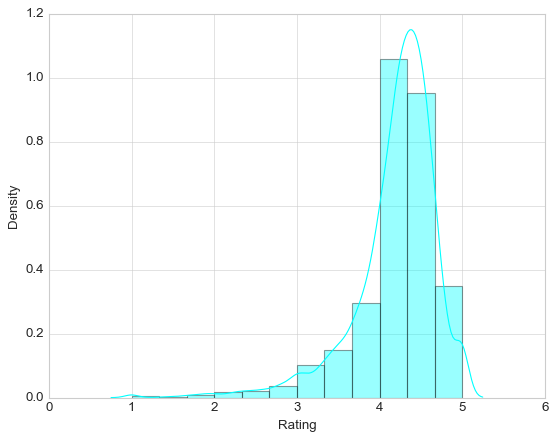

In [75]:
sns.distplot(data1.Rating, bins= 12, color= "cyan")
plt.show()

In [76]:
plt.style.use("dark_background")

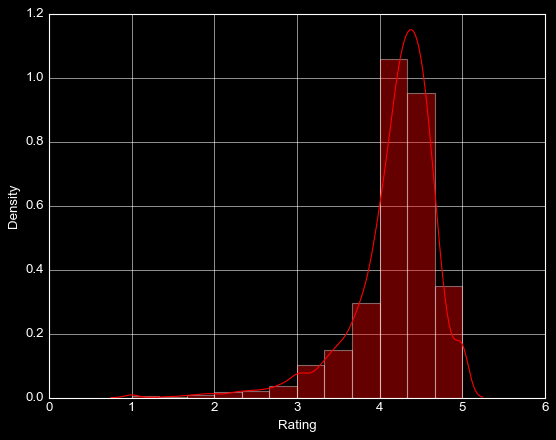

In [77]:
sns.distplot(data1.Rating, bins= 12, color= "red")
plt.show()

In [78]:
data1["Content Rating"].value_counts()

Everyone           7394
Teen               1082
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

## drop the adults and unrated 

In [79]:
data1[data1["Content Rating"].isin(['Adults only 18+','Unrated'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.6,24005,4900.000000,500000,Free,0.0,Adults only 18+,Comics,"July 4, 2018",1.1.7.0,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.5,50017,41000.000000,1000000,Free,0.0,Adults only 18+,Sports,"July 24, 2018",3.21.324,4.4 and up
6424,Manga Books,COMICS,3.8,7326,21516.529524,500000,Free,0.0,Adults only 18+,Comics,"August 3, 2018",Varies with device,Varies with device
8266,DC Universe Online Map,TOOLS,4.1,1186,6400.000000,50000,Free,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [80]:
data1 = data1[~data1["Content Rating"].isin(['Adults only 18+','Unrated'])]

In [81]:
data1.shape

(9334, 13)

In [82]:
data1.reset_index(inplace=True, drop=True)

In [83]:
data1['Content Rating'].value_counts()

Everyone        7394
Teen            1082
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

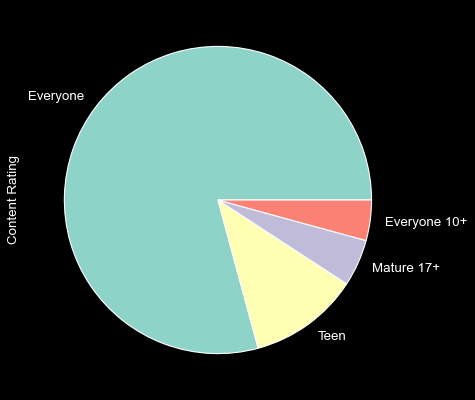

In [84]:
data1['Content Rating'].value_counts().plot.pie()
plt.show()

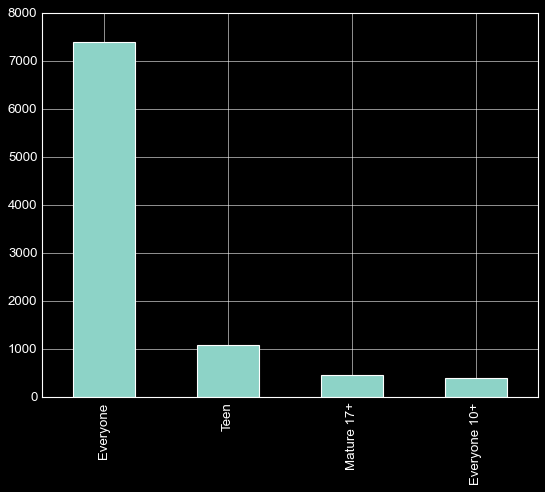

In [85]:
data1['Content Rating'].value_counts().plot.bar()
plt.show()

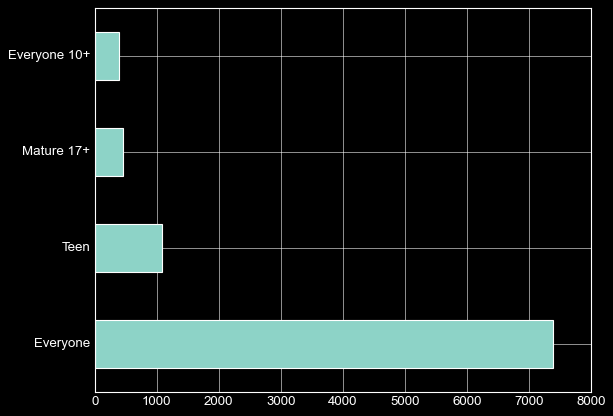

In [86]:
data1['Content Rating'].value_counts().plot.barh()
plt.show()

## scatter plot - to analyse the (size of the app and rating of the app)

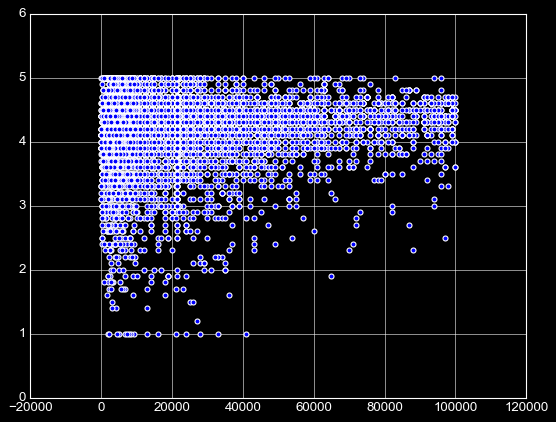

In [87]:
plt.scatter(data1.Size, data1.Rating)
plt.show()

In [88]:
sns.set_style("white")

In [89]:
?sns.jointplot

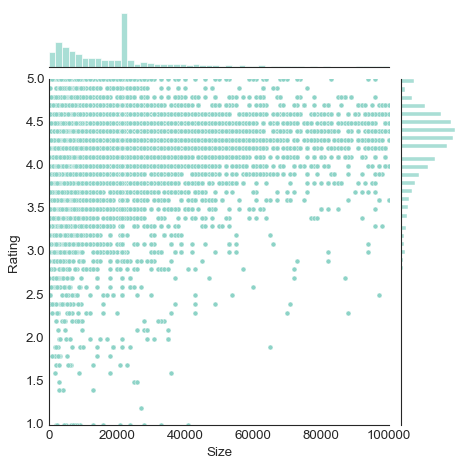

In [90]:
sns.jointplot(data1.Size, data1.Rating)
plt.show()

## rating vs price

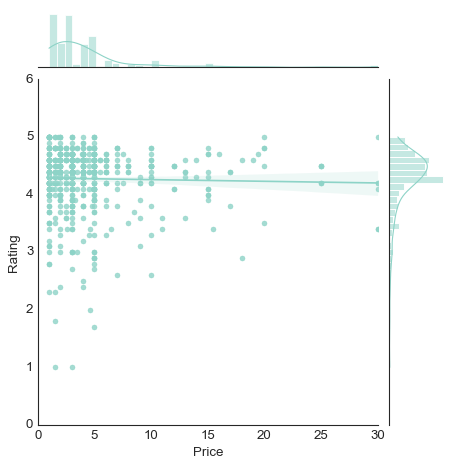

In [91]:
sns.jointplot("Price", "Rating", data=data1[data1.Price>0], kind="reg")
plt.show()

## we can look at all the numeric columns together  - pair plot

In [92]:
?sns.pairplot

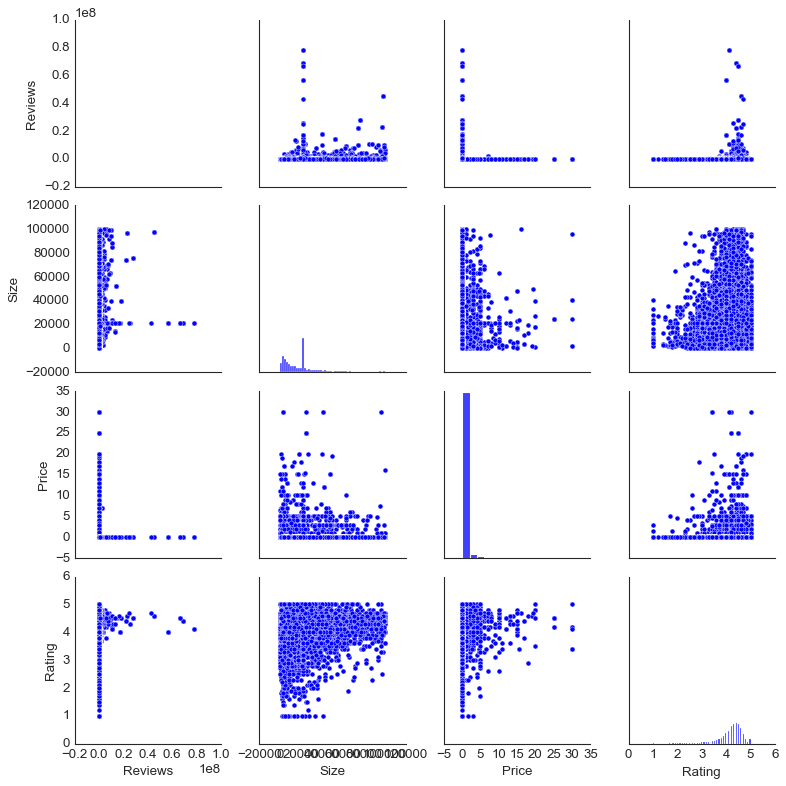

In [93]:
sns.pairplot(data1[["Reviews", "Size", "Price", "Rating"]])
plt.show()

## content rating vs rating

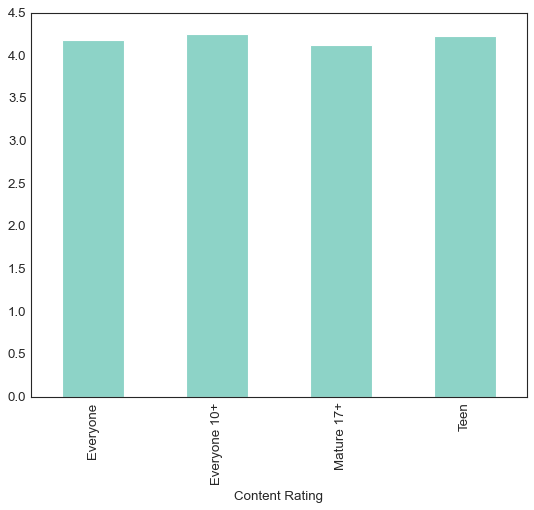

In [94]:
data1.groupby(['Content Rating'])['Rating'].mean().plot.bar()
plt.show()

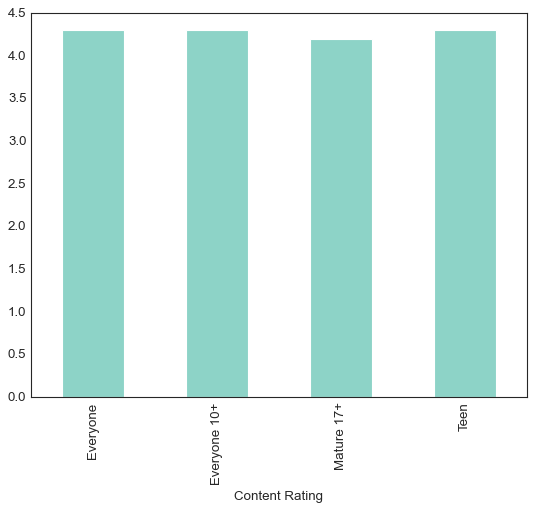

In [95]:
data1.groupby(['Content Rating'])['Rating'].median().plot.bar()
plt.show()

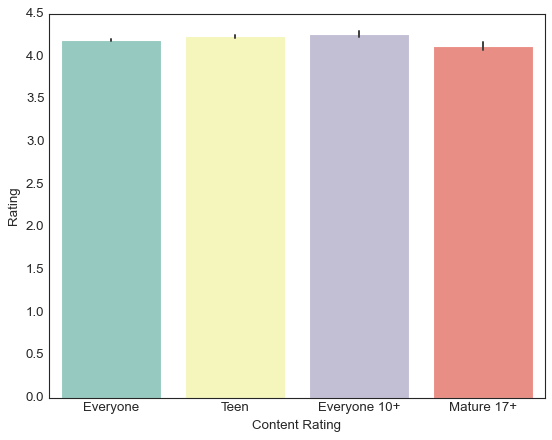

In [96]:
sns.barplot(data=data1, x= "Content Rating", y= "Rating")
plt.show()

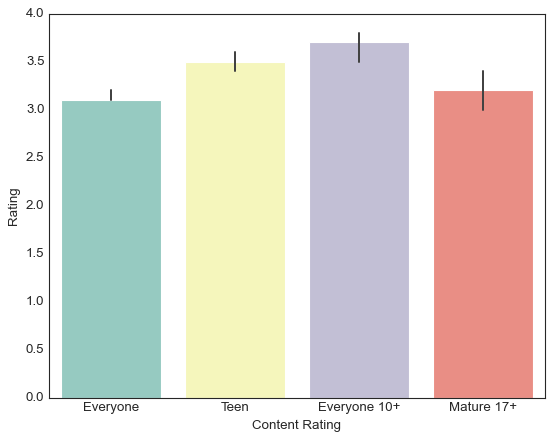

In [97]:
sns.barplot(data=data1, x= "Content Rating", y= "Rating", estimator= lambda x: np.quantile(x, 0.05))
plt.show()

## box plot of rating for each content rating

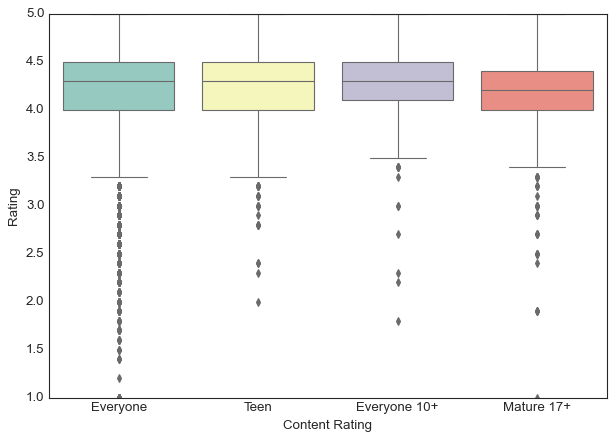

In [98]:
plt.figure(figsize=[9,6])
sns.boxplot(data1['Content Rating'], data1.Rating)
plt.show()

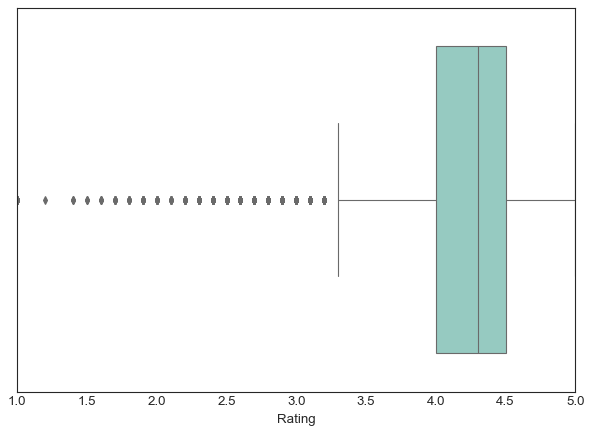

In [99]:
plt.figure(figsize=[9,6])
sns.boxplot(data1.Rating)
plt.show()

## Heatmaps

## Rating vs Size vs Content Rating

In [100]:
?pd.qcut

In [101]:
data1['Size_Qcut'] = pd.qcut(data1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ['VL', 'L', 'M', 'H', 'VH'])

In [102]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Qcut
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,L
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [103]:
?pd.pivot_table

In [104]:
pd.pivot_table(data=data1, index="Content Rating", columns="Size_Qcut", values= "Rating", aggfunc=np.median)

Size_Qcut,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.3,4.3,4.30,4.3
Everyone 10+,4.1,4.3,4.3,4.30,4.4
Mature 17+,4.3,4.2,4.2,4.20,4.2
Teen,4.3,4.3,4.3,4.25,4.3


In [105]:
pd.pivot_table(data=data1, index="Content Rating", columns="Size_Qcut", values= "Rating", aggfunc=lambda x: np.quantile(x,0.2))

Size_Qcut,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.1,3.82,4.00
Everyone 10+,3.86,4.06,4.1,4.00,4.02
Mature 17+,3.42,3.60,4.0,3.90,4.00
Teen,3.80,3.90,4.0,4.00,4.00


In [107]:
result = pd.pivot_table(data=data1, index="Content Rating", columns="Size_Qcut", values= "Rating", aggfunc=lambda x: np.quantile(x,0.2))

In [108]:
?sns.heatmap

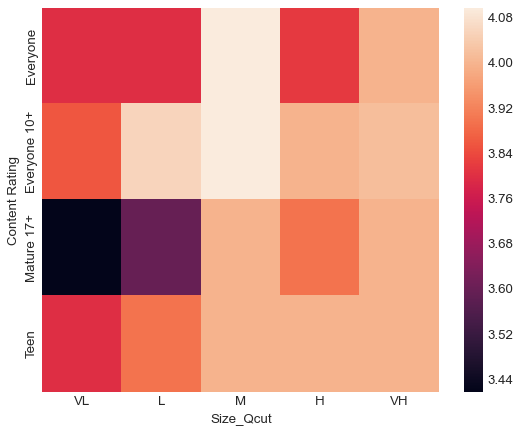

In [110]:
sns.heatmap(result)
plt.show()

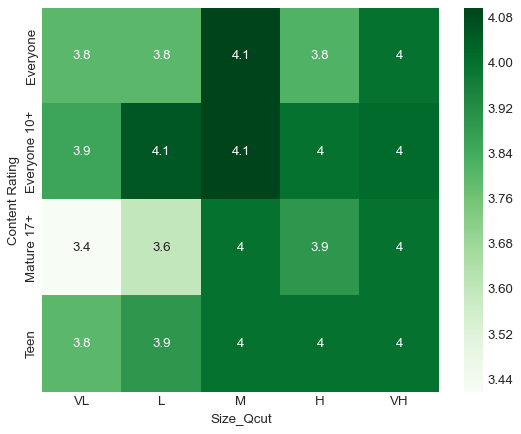

In [111]:
sns.heatmap(result, cmap="Greens", annot=True)
plt.show()

## line charts

In [112]:
data1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int64
Size               float64
Installs             int64
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Qcut         category
dtype: object

In [113]:
data1['Last Updated']

0        January 7, 2018
1       January 15, 2018
2         August 1, 2018
3           June 8, 2018
4          June 20, 2018
              ...       
9329       June 18, 2017
9330       July 25, 2017
9331        July 6, 2018
9332    January 19, 2015
9333       July 25, 2018
Name: Last Updated, Length: 9334, dtype: object

In [115]:
data1['Updated_Month'] = pd.to_datetime(data1['Last Updated']).dt.month

In [117]:
data1.groupby(['Updated_Month'])['Rating'].mean()

Updated_Month
1     4.143735
2     4.094048
3     4.110989
4     4.154910
5     4.162410
6     4.184316
7     4.249841
8     4.292963
9     4.042636
10    4.019688
11    4.112338
12    4.071726
Name: Rating, dtype: float64

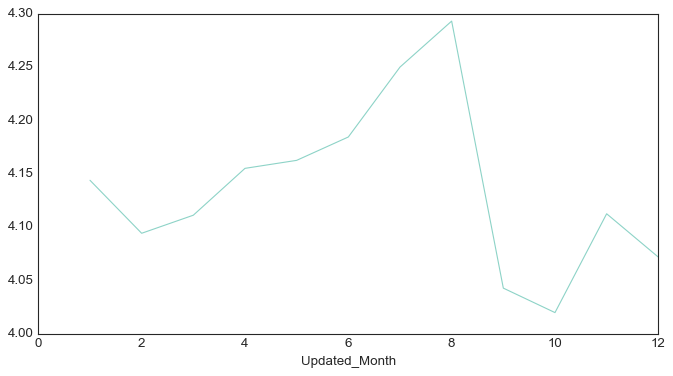

In [118]:
plt.figure(figsize=[10,5])
data1.groupby(['Updated_Month'])['Rating'].mean().plot()
plt.show()

In [119]:
data1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Qcut,Updated_Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,L,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL,6


In [120]:
pd.pivot_table(data=data1, index="Updated_Month", columns="Content Rating", values="Installs", aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Updated_Month,,,,
1,1025387390,105282000,9701210,44159010
2,945372005,19821000,13021500,39597710
3,1045365520,30322510,9111100,99850310
4,2593371180,23300000,5259000,271619410
5,5431067800,128173500,110140100,562689600
6,6157170505,1367727100,155257200,505716600
7,46991109680,9726556000,1739491910,15983556800
8,46490943320,1715821000,3462981700,16997855650
9,410340410,24931100,2201010,22483100


In [121]:
monthly = pd.pivot_table(data=data1, index="Updated_Month", columns="Content Rating", values="Installs", aggfunc=sum)

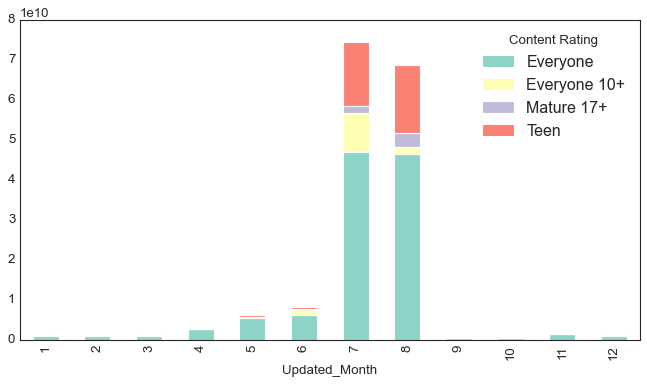

In [122]:
monthly.plot(kind="bar", stacked="True", figsize=[10,5])
plt.show()

## get proportions/perc instead of absolutes values

In [125]:
monthly_per = monthly[['Everyone', 'Everyone 10+', 'Mature 17+', 'Teen']].apply(lambda x: x/x.sum(), axis=1)


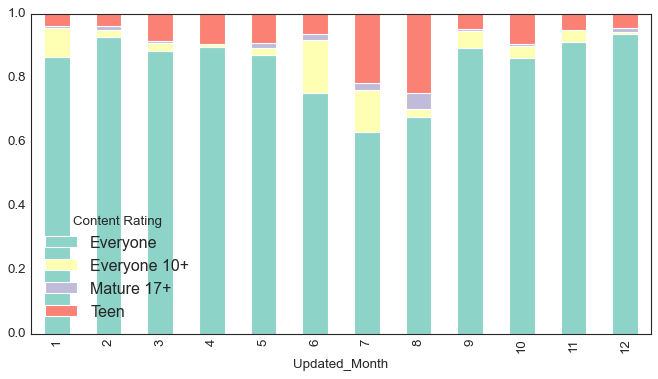

In [127]:
monthly_per.plot(kind="bar", stacked="True", figsize=[10,5])
plt.show()